In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import numpy as np; np.random.seed(42)

In [27]:
df = pd.read_csv('export_datam_G16.csv',date_parser='datetime')
no_files = 145
s=df.head(no_files)#1 day
s.head()

,Unnamed: 0,m,datetime
0,0,245.711865,08/04/2019 00:00
1,1,245.700933,08/04/2019 00:10
2,2,245.688736,08/04/2019 00:20
3,3,245.678122,08/04/2019 00:30
4,4,245.664656,08/04/2019 00:40


In [32]:
x = s.datetime
y = s.m
file = '482019.png'
jpg_name_np = np.array([file]*no_files).astype('<U12') # names of your images files
jpg_name_np.shape

(145,)

<IPython.core.display.Javascript object>


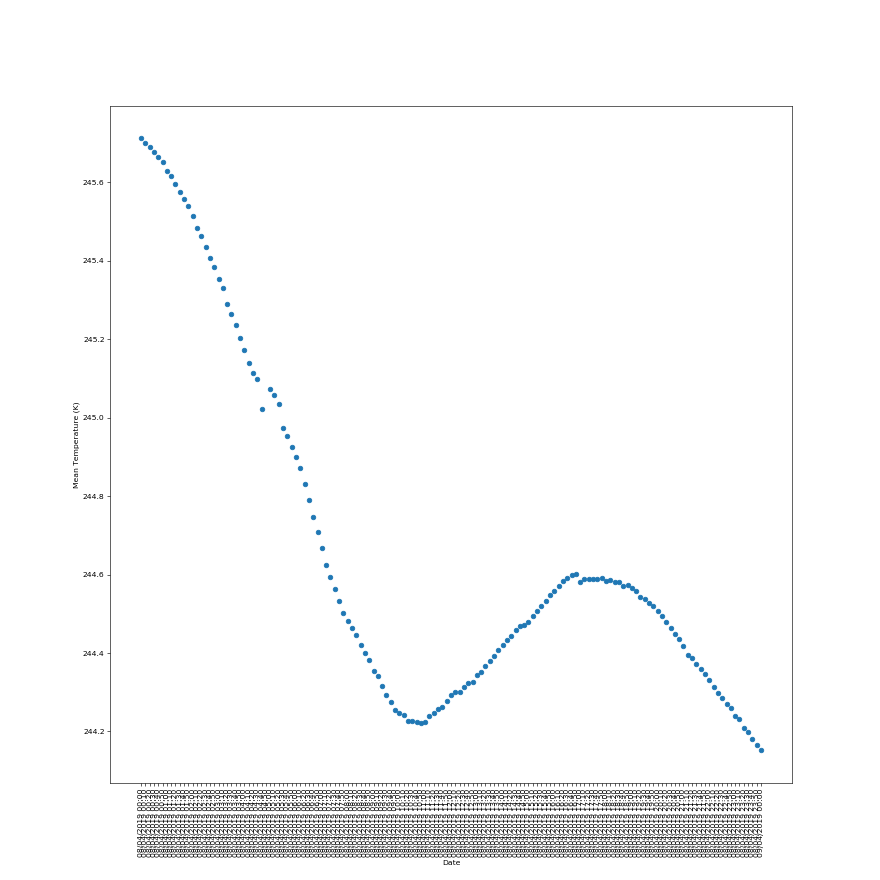

In [33]:
%matplotlib notebook
# create figure and plot scatter
fig = plt.figure(figsize=(16, 16), dpi=50)
ax = fig.add_subplot(111)
line = plt.scatter(x,y)
line1 = plt.xticks(rotation=90)
#line1 = plt.rc('xtick', labelsize=5) 
line1 = plt.xlabel('Date')
line1 = plt.ylabel('Mean Temperature (K)')
image_path = np.asarray(jpg_name_np)

# create the annotations box
image = plt.imread(image_path[0])
im = OffsetImage(image, zoom=0.6)
xybox=(50., 50.)
ab = AnnotationBbox(im, (0,0), xybox=xybox, xycoords='data',
        boxcoords="offset points",  pad=0.3,  arrowprops=dict(arrowstyle="->"))
# add it to the axes and make it invisible
ax.add_artist(ab)
ab.set_visible(False)

def hover(event):
    # if the mouse is over the scatter points
    if line.contains(event)[0]:
        # find out the index within the array from the event
        ind, = line.contains(event)[1]["ind"]
        # get the figure size
        w,h = fig.get_size_inches()*fig.dpi
        ws = (event.x > w/2.)*-1 + (event.x <= w/2.) 
        hs = (event.y > h/2.)*-1 + (event.y <= h/2.)
        # if event occurs in the top or right quadrant of the figure,
        # change the annotation box position relative to mouse.
        ab.xybox = (xybox[0]*ws, xybox[1]*hs)
        # make annotation box visible
        ab.set_visible(True)
        # place it at the position of the hovered scatter point
        ab.xy =(x[ind], y[ind])
        # set the image corresponding to that point
        im.set_data(plt.imread(image_path[ind]))
    else:
        #if the mouse is not over a scatter point
        ab.set_visible(False)
    fig.canvas.draw_idle()

# add callback for mouse moves
fig.canvas.mpl_connect('motion_notify_event', hover)  

fig = plt.gcf()
plt.show()